# Andrew Thompson Concordance CS 499 Assignment
## YOUTUBE LINK:
https://youtu.be/ubpdDEFYHBI

In [1]:
import pandas as pd
import numpy as np 
import re
import nltk

/var/folders/r8/zmh3qtcn4cq63gtvkg3zj9_00000gn/T/ipykernel_15006/2093185156.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# BRING IN PDF TEXT
doc_path = 'farewell_to_arms_exported'
file = open(doc_path, "r")

# EMPTY LIST FOR TEXT
full_text = ""
# ADD THE TEXT FROM EACH LINE
for i in file:
        full_text+= i
lines = []
start = 0
end = 0
for i in range(0, len(full_text)):
    if full_text[i] == "\n":
        start = end
        end = i
        lines.append(full_text[start:end])
paragraphs = []
for line in lines:
    # THIS SEARCHES FOR PAGE NUMBERS AND SEPARATES PAGES
    index = len(line)
    for char in reversed(line):
        if char.isdigit():
            index -= 1
        else:
            break
    text_part = line[:index]
    digits_part = line[index:]
    if text_part.strip():
        paragraphs.append(text_part.strip().replace("\n", " ").replace("\'", ""))
    #ADD PAGE NUMBERS AS A SEPARATE ITEM
    if digits_part:
        paragraphs.append(digits_part)

In [3]:
page = 0
chapter = 0

start = 0
end = 0
pagetext = []
pagetemp = ""
for i in range(0, len(paragraphs)):
    if not paragraphs[i].isnumeric():
        pagetemp += paragraphs[i] + " "
    try:
        if int(paragraphs[i])> page:
            pagetext.append(f'{page}')
            pagetext.append(pagetemp)
            page+=1
            pagetemp = ""
        
    except:
        continue


In [4]:
page = 0
chapter = 0
start = 0
end = 0
pagetextdict = {}
pagetemp = ""
longstring = ""
for i in range(0, len(paragraphs)):
    if not paragraphs[i].isnumeric():
        pagetemp += paragraphs[i] + " "
        longstring+= pagetemp + " "
    try:
        if int(paragraphs[i])> page:
            pagetextdict[page] = {pagetemp.lower()}
            page+=1
            pagetemp = ""  
    except:
        continue
print(pagetextdict)

{0: {''}, 1: {'a farewell to arms by ernest hemingway a farewell to arms to g.a. pfeiffer book one '}, 2: {''}, 3: {'in the late summer of that year we lived in a house in a village that looked across the river and the plain to the mountains. in the bed of the river there were pebbles and boulders, dry and white in the sun, and the water was clear and swiftly moving and blue in the channels. troops went by the house and down the road and the dust they raised powdered the leaves of the trees. the trunks of the trees too were dusty and the leaves fell early that year and we saw the troops marching along the road and the dust rising and leaves, stirred by the breeze, falling and the soldiers marching and afterward the road bare and white except for the leaves. the plain was rich with crops; there were many orchards of fruit trees and beyond the plain the mountains were brown and bare. there was fighting in the mountains and at night we could see the flashes from the artillery. in the dark

In [5]:
from textblob import TextBlob
from nltk.corpus import stopwords
stops = stopwords.words('english')
stops.append("said")
stops.append("n\'t")
stops.append("\'ll")
stops.append("\'ve")
stops.append("\'s")
longstring = ""
for i in range(len(pagetext)):
    if pagetext[i].isnumeric():
        page = pagetext[i]
    else:
        longstring+= f'{pagetext[i].lower()} '

text = TextBlob(longstring)
remaining_words = [word for word in text.words if word not in stops]

wostopwords = ""
for i in remaining_words:
    wostopwords += i + " "
shorttext = TextBlob(wostopwords)
word_counts = shorttext.word_counts

print(shorttext)

farewell arms ernest hemingway farewell arms g.a pfeiffer book one late summer year lived house village looked across river plain mountains bed river pebbles boulders dry white sun water clear swiftly moving blue channels troops went house road dust raised powdered leaves trees trunks trees dusty leaves fell early year saw troops marching along road dust rising leaves stirred breeze falling soldiers marching afterward road bare white except leaves plain rich crops many orchards fruit trees beyond plain mountains brown bare fighting mountains night could see flashes artillery dark like summer lightning nights cool feeling storm coming sometimes dark heard troops marching window guns going past pulled motor-tractors much traffic night many mules roads boxes ammunition side pack saddles gray motor trucks carried men trucks loads covered canvas moved slower traffic big guns passed day drawn tractors long barrels guns covered green branches green leafy branches vines laid tractors north cou

In [6]:
from textblob import TextBlob
# Creates dictionary with multiple columns to keep track of information
# Keeps track of word, count, pages, context, and chapters
words = text.words
word_counts2 = {}
for i in range(len(words)):
    if words[i] in word_counts:
        word_counts2[words[i]] = {'word': words[i], 'count': word_counts[words[i]], 'pages': [], 'contexts': [], 'chapters': []}
for index in range(len(words)):
    if words[index] in word_counts:
        word_counts2[words[index]]['count'] = word_counts[words[index]]
        tempstr = ""
        str = words[max(0, index - 3):min(len(words), index + 3 + 1)]
        for x in str: 
            tempstr += f'{x} '
        word_counts2[words[index]]['contexts'].append(tempstr)
print(word_counts2[words[index-1]])


{'word': 'tell', 'count': 99, 'pages': [], 'contexts': ['did you do tell me everything at ', 'napoli thats enough tell me really what ', 'did you feel tell me everything at ', 'to-night you will tell me everything said ', 'i tried to tell about the night ', 'i could not tell it as i ', 'i can not tell it now but ', 'afraid not now tell me why did ', 'you could not tell anything about them ', 'asked me to tell you she was ', 'well will you tell her how sorry ', 'you could hardly tell if you really ', 'cigarette thanks they tell me youve lost ', 'you about they tell me youre an ', 'be the bronze tell me exactly what ', 'proud of you tell me just exactly ', 'silver go on tell me tell me ', 'on tell me tell me all about ', 'go i said tell me about gorizia ', 'the silver medal tell me baby when ', 'inexperience truly i tell you something about ', 'angry i just tell you baby for ', 'were sweet to tell me we wont ', 'it i can tell i do not ', 'do what you tell me about in ', 'it i will tell y

In [7]:
from textblob import TextBlob
empty_list = []
# Adds pages to the dictionary of word information
pagetextdict2 = pagetextdict
words = text.words
for index in range(len(words)):
    if words[index] in word_counts:
        for page_number, page_text in pagetextdict2.items():
            page_words = list(page_text)[0].split()
            if words[index] in page_words:
                empty_list.append(f'{page_number} {words[index]}')
                word_counts2[words[index]]['pages'].append(page_number)
    print(len(words)-index)
empty_listdf = pd.DataFrame(empty_list)

print(empty_listdf.head(n = 15))


88401
88400
88399
88398
88397
88396
88395
88394
88393
88392
88391
88390
88389
88388
88387
88386
88385
88384
88383
88382
88381
88380
88379
88378
88377
88376
88375
88374
88373
88372
88371
88370
88369
88368
88367
88366
88365
88364
88363
88362
88361
88360
88359
88358
88357
88356
88355
88354
88353
88352
88351
88350
88349
88348
88347
88346
88345
88344
88343
88342
88341
88340
88339
88338
88337
88336
88335
88334
88333
88332
88331
88330
88329
88328
88327
88326
88325
88324
88323
88322
88321
88320
88319
88318
88317
88316
88315
88314
88313
88312
88311
88310
88309
88308
88307
88306
88305
88304
88303
88302
88301
88300
88299
88298
88297
88296
88295
88294
88293
88292
88291
88290
88289
88288
88287
88286
88285
88284
88283
88282
88281
88280
88279
88278
88277
88276
88275
88274
88273
88272
88271
88270
88269
88268
88267
88266
88265
88264
88263
88262
88261
88260
88259
88258
88257
88256
88255
88254
88253
88252
88251
88250
88249
88248
88247
88246
88245
88244
88243
88242
88241
88240
88239
88238
88237
88236
8823

In [8]:
# Creates a pages set
for i in word_counts2:
    word_counts2[i]['pages'] = set(word_counts2[i]['pages'])

# Chapters dictionary
Chapters = {
0:[1,2,79,80],
1:list(range(3,5)),
2:list(range(5,10)),
3:list(range(10,15)),
4:list(range(15,22)),
5:list(range(22,28)),
6:list(range(28,33)),
7:list(range(33,42)),
8:list(range(42,46)),
9:list(range(46,62)),
10:list(range(62,68)),
11:list(range(68,74)),
12:list(range(74,79)),
13:list(range(81,89)),
14:list(range(89,94)),
15:list(range(94,101)),
16:list(range(101,107)),
17:list(range(107,112)),
18:list(range(112,117)),
19:list(range(117,127)),
20:list(range(127,133)),
21:list(range(133,142)),
22:list(range(142,146)),
23:list(range(146,156)),
24:list(range(156,163)),
25:list(range(163,177)),
26:list(range(177,181)),
27:list(range(181,194)),
28:list(range(194,203)),
29:list(range(203,209)),
30:list(range(209,226)),
31:list(range(226,231)),
32:list(range(231,237)),
33:list(range(237,243)),
34:list(range(243,253)),
35:list(range(253,264)),
36:list(range(264,270)),
37:list(range(270,289)),
38:list(range(289,302)),
39:list(range(302,306)),
40:list(range(306,312)),
41:list(range(312,332))
}
# Fills the chapters column
for index in word_counts2:
    for traverse in Chapters:
        for y in Chapters[traverse]:
            if y in list(word_counts2[index]['pages']):
                word_counts2[index]['chapters'].append(traverse)
# Creates a chapters set
for i in word_counts2:
    word_counts2[i]['chapters'] = set(word_counts2[i]['chapters'])
print(word_counts2)


{'farewell': {'word': 'farewell', 'count': 2, 'pages': {1}, 'contexts': ['a farewell to arms by ', 'ernest hemingway a farewell to arms to '], 'chapters': {0}}, 'arms': {'word': 'arms', 'count': 14, 'pages': {224, 1, 194, 225, 267, 211, 52, 53, 55, 56, 158}, 'contexts': ['a farewell to arms by ernest hemingway ', 'a farewell to arms to g.a pfeiffer ', 'man under the arms and by the ', 'lifted it to arms length and the ', 'along with my arms and elbows passini ', 'me under the arms and somebody else ', 'musettes and my arms around the other ', 'held both his arms old baby he ', 'were in my arms and i in ', 'small and his arms were by his ', 'rested again my arms around some brush ', 'i slapped my arms to keep the ', 'head on my arms my knee was ', 'of rowing my arms and shoulders and '], 'chapters': {0, 36, 9, 24, 28, 30}}, 'ernest': {'word': 'ernest', 'count': 1, 'pages': {1}, 'contexts': ['to arms by ernest hemingway a farewell '], 'chapters': {0}}, 'hemingway': {'word': 'hemingway', 

In [9]:
# Creates simple dataframe
dataframe = pd.DataFrame([[k] + [v] for k, v in word_counts2.items()])
print(dataframe.head(n= 20))
dataframe.to_csv("Dictionary.csv")





            0                                                  1
0    farewell  {'word': 'farewell', 'count': 2, 'pages': {1},...
1        arms  {'word': 'arms', 'count': 14, 'pages': {224, 1...
2      ernest  {'word': 'ernest', 'count': 1, 'pages': {1}, '...
3   hemingway  {'word': 'hemingway', 'count': 1, 'pages': {1}...
4         g.a  {'word': 'g.a', 'count': 1, 'pages': {}, 'cont...
5    pfeiffer  {'word': 'pfeiffer', 'count': 1, 'pages': {1},...
6        book  {'word': 'book', 'count': 7, 'pages': {1, 231,...
7         one  {'word': 'one', 'count': 319, 'pages': {1, 4, ...
8        late  {'word': 'late', 'count': 18, 'pages': {290, 3...
9      summer  {'word': 'summer', 'count': 19, 'pages': {162,...
10       year  {'word': 'year', 'count': 22, 'pages': {193, 1...
11      lived  {'word': 'lived', 'count': 17, 'pages': {3, 4,...
12      house  {'word': 'house', 'count': 42, 'pages': {3, 5,...
13    village  {'word': 'village', 'count': 10, 'pages': {3, ...
14     looked  {'word': '

In [10]:
import pandas as pd

# Turn dictionary into data frame
data_for_df = []

for key in word_counts2:
    row = word_counts2[key]
    data_for_df.append(row)

word_counts_df = pd.DataFrame(data_for_df)

print(word_counts_df)
word_counts_df.to_csv("word_counts_df.csv")

             word  count                                              pages  \
0        farewell      2                                                {1}   
1            arms     14  {224, 1, 194, 225, 267, 211, 52, 53, 55, 56, 158}   
2          ernest      1                                                {1}   
3       hemingway      1                                                {1}   
4             g.a      1                                                 {}   
...           ...    ...                                                ...   
5094      liqueur      1                                              {322}   
5095    reckoning      1                                                 {}   
5096       winked      1                                              {324}   
5097        trick      1                                                 {}   
5098  unconscious      2                                              {324}   

                                               cont

# Analysis
## Youtube Link
https://youtu.be/CVAaHrrRcTo

This concordance was a difficult creation, but it is useful to determine a few things about the text. Firstly, it obviously helps display frequency

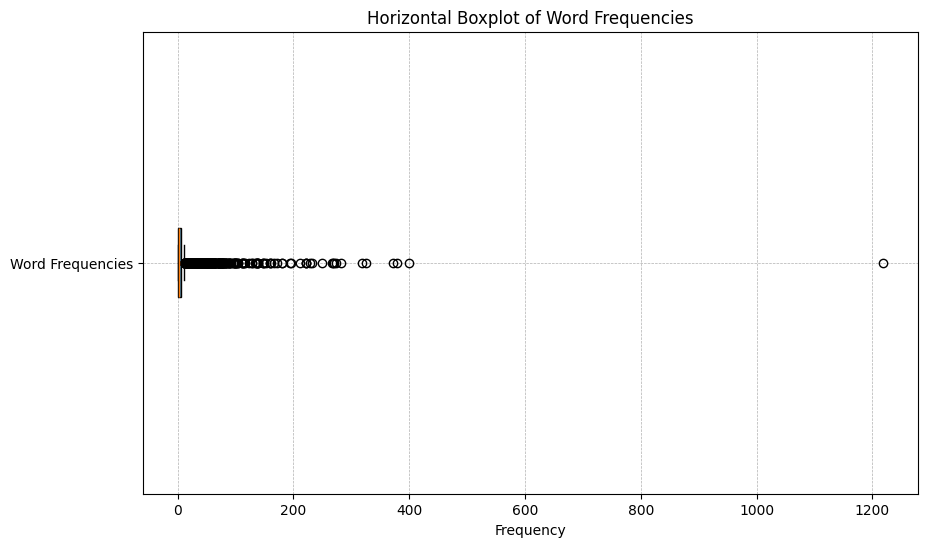

In [35]:
frequencies = list(word_counts.values())

# Creating the boxplot
plt.figure(figsize=(10, 6))  # Adjust the size as needed
plt.boxplot(frequencies, vert=False, patch_artist=True)  # Set `vert=False` for horizontal boxplot

# Adding labels and title
plt.xlabel('Frequency')
plt.title('Horizontal Boxplot of Word Frequencies')

# Optionally, you can customize ticks, labels, or add gridlines if needed
plt.yticks([1], ['Word Frequencies'])  # Adjust or remove as needed
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig("boxplot_of_frequency.png")
plt.show()

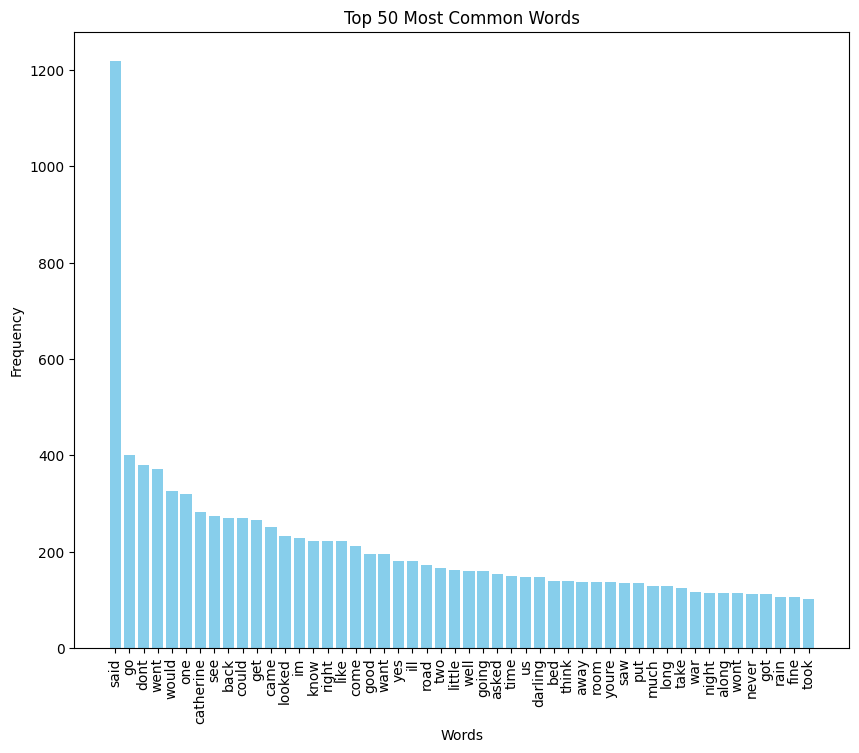

In [33]:
top_50_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:50]

# Unzip the words and their frequencies into two lists
words, frequencies = zip(*top_50_words)

# Creating the bar graph
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
plt.bar(words, frequencies, color='skyblue')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Adding labels and title
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 50 Most Common Words')
plt.savefig("50_common_words.png")
plt.show()


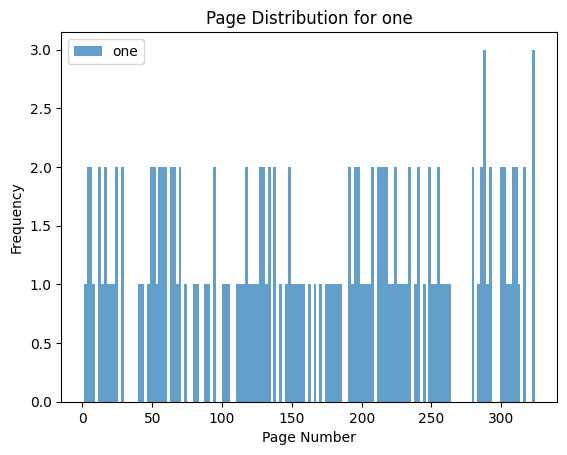

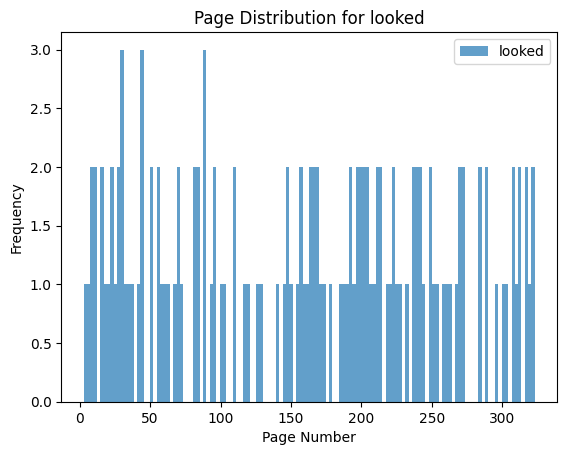

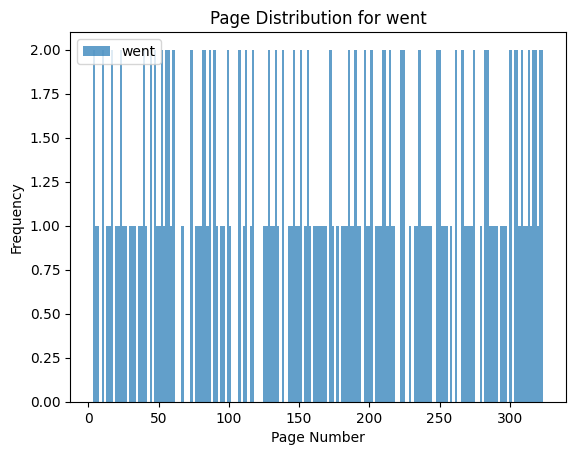

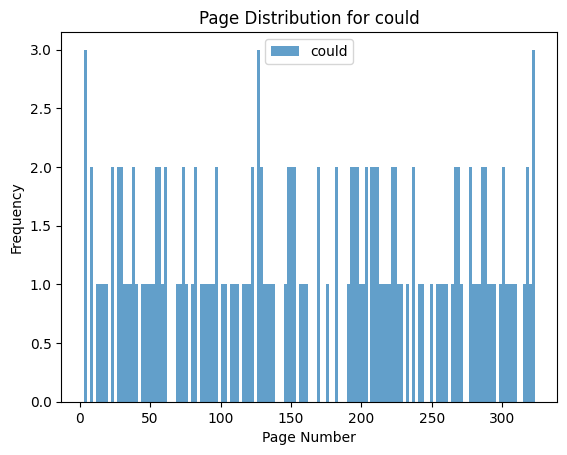

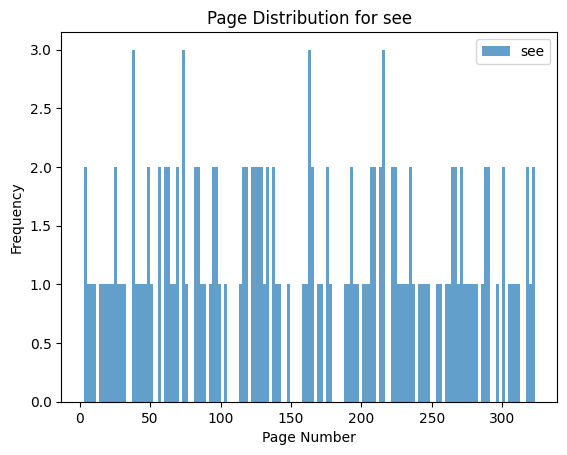

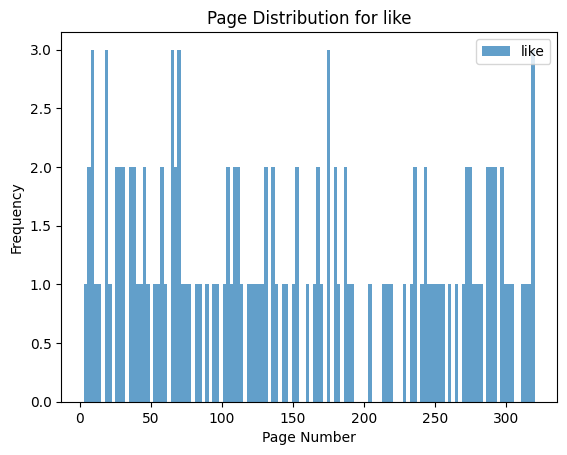

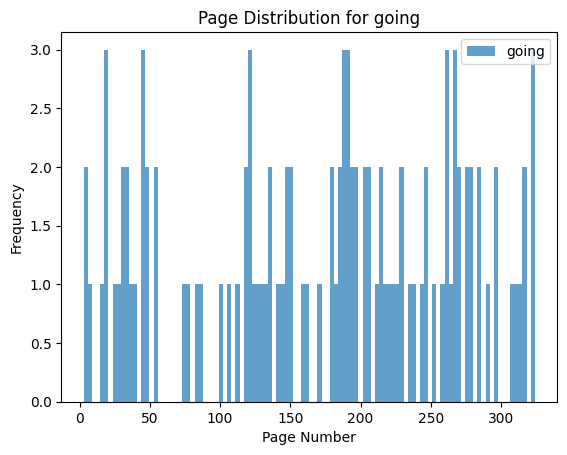

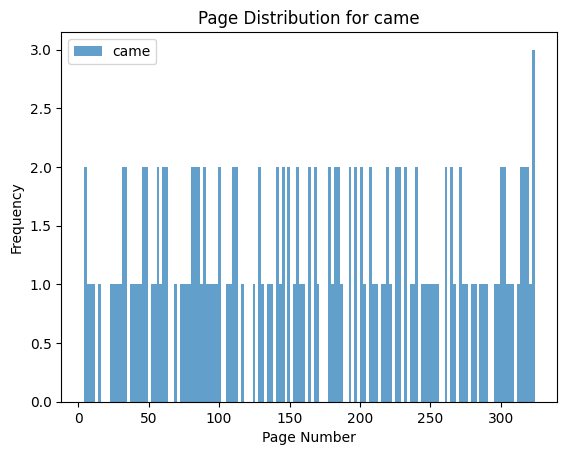

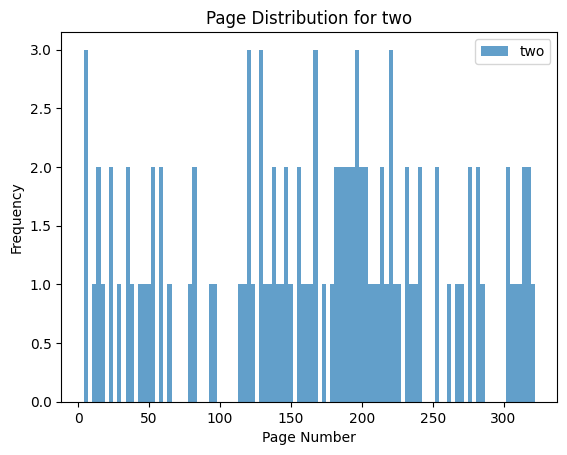

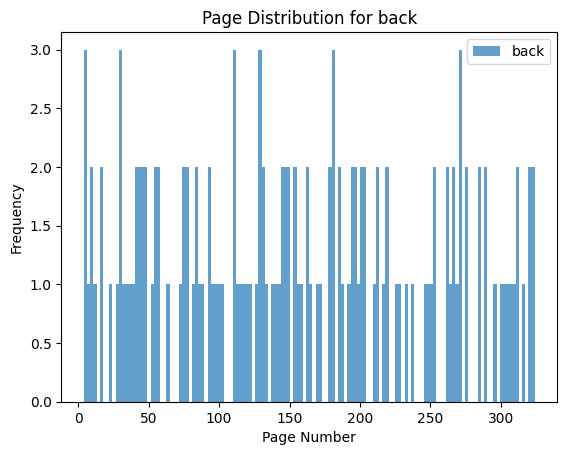

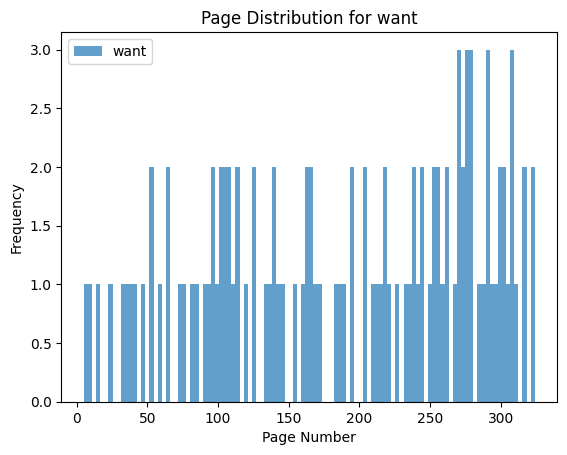

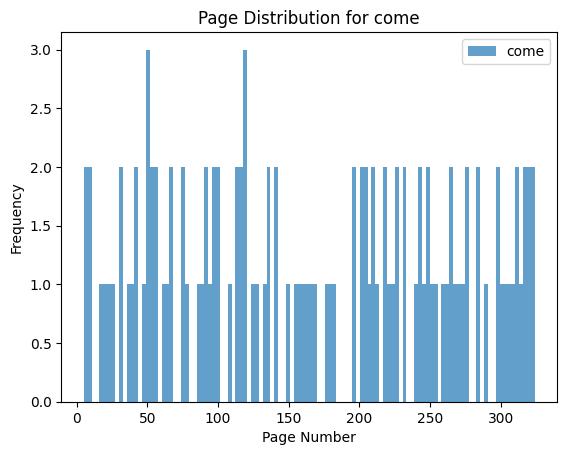

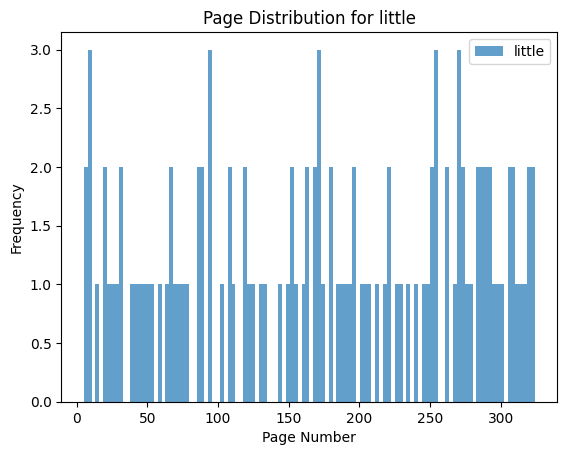

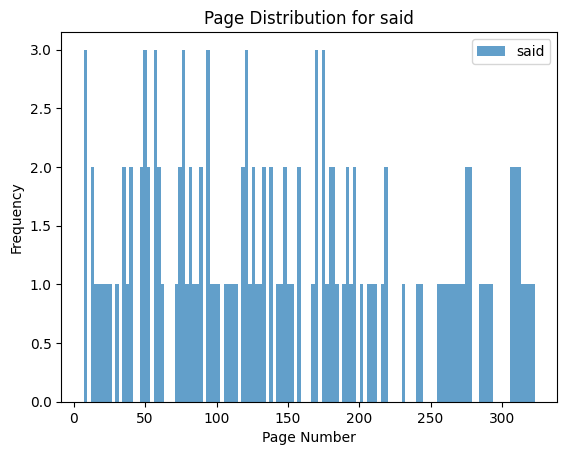

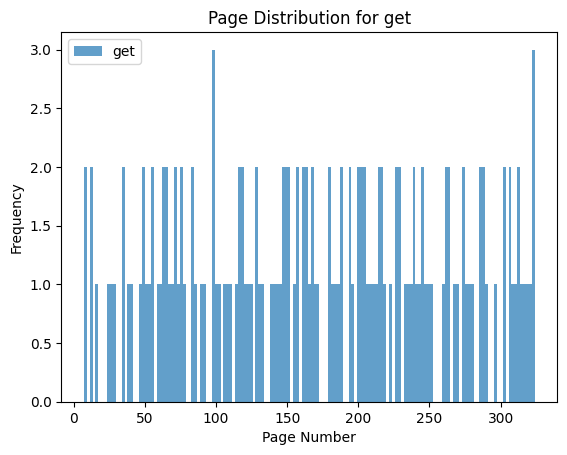

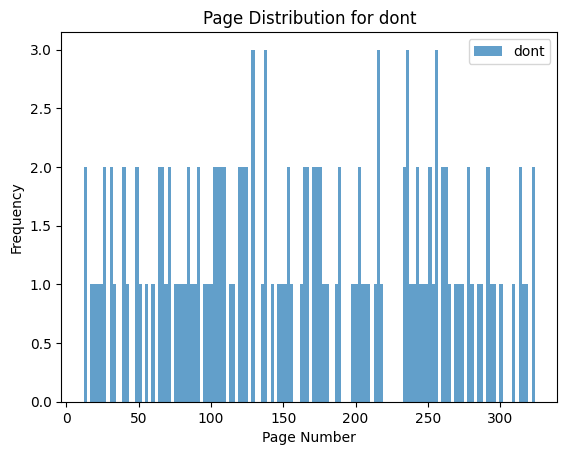

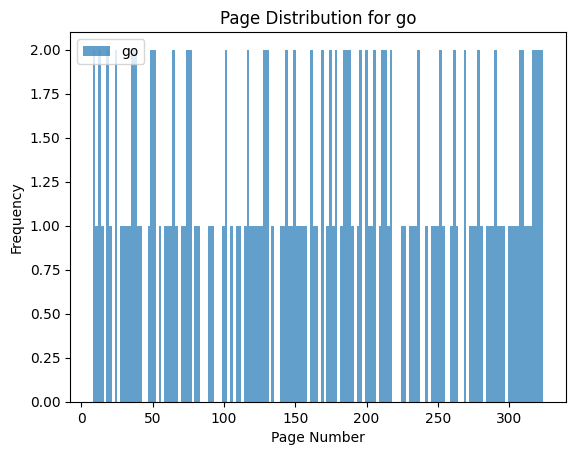

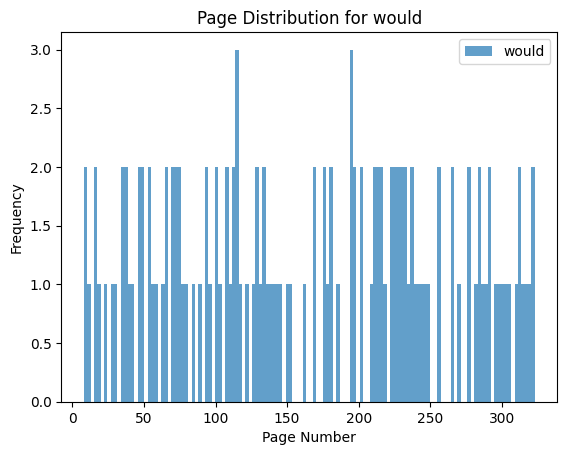

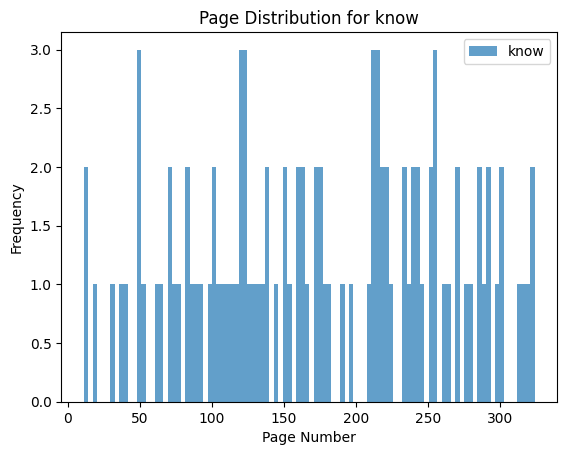

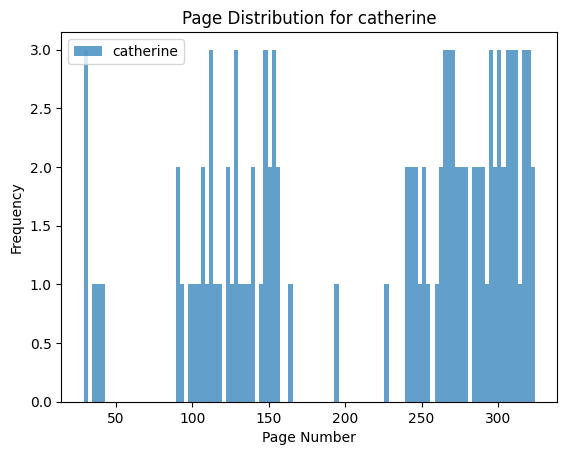

In [32]:
import matplotlib
import matplotlib.pyplot as plt
for word, info in word_counts2.items():
    if len(list(word_counts2[word]['pages'])) in range(100, 500):
        plt.figure()
        plt.hist(list(info['pages']), bins=len(info['pages']), alpha=0.7, label=word)
        plt.xlabel('Page Number')
        plt.ylabel('Frequency')
        plt.title(f'Page Distribution for {word}')
        plt.legend()
        plt.savefig("cathering_pgdistribution.png")
        plt.show()
